# Hausaufgabe 4
## Schallerzeugung durch einen umströmten Zylinder (Teil 1)
<!-- Lizensiert unter (CC BY 4.0) Gert Herold -->

Bei der Umströmung eines zylindrischen Körpers bilden sich hinter diesem häufig [Wirbelstraßen](https://de.wikipedia.org/wiki/K%C3%A1rm%C3%A1nsche_Wirbelstra%C3%9Fe) aus.
Je nach Medium, Strömungsgeschwindigkeit und Durchmesser des Zylinders können die gegenläufigen Wirbel wahrnehmbare Töne verursachen.

Hier soll basierend auf experimentellen Daten untersucht werden, wie die erzeugten Töne von der Strömungsgeschwindigkeit abhängen.
In einem Windkanal wurden zu diesem Zweck die Schallabstrahlung eines Zylinder mit 6 mm Durchmesser bei ~~15~~ 13 verschiedenen Geschwindigkeiten zwischen ca. $8$ und $50\,\frac{\text{m}}{\text{s}}$  gemessen und das Ergebnis in WAV-Dateien abgespeichert.

### 1) Einlesen der Daten

Die WAV-Dateien sollten für diese Aufgabe entpackt und in einem Unterordner "data" abgelegt werden.

**1.1) Erstellen Sie automatisiert eine Liste `wavlist` der Dateinamen der WAV-Dateien im Unterordner "data". Extrahieren Sie die jeweils zugehörige Strömungsgeschwindigkeit in $\frac{\text{m}}{\text{s}}$ automatisiert aus den Dateinamen, schreiben Sie sie in eine Liste `vlist` mit Fließkommawerten. Geben Sie beide Listen aus.**

_Hinweis: Als Dezimaltrennzeichen wurde für die Geschwindigkeit im Dateinamen ein "o" verwendet, um Probleme mit der Identifikation der Dateiendung zu vermeiden._

In [49]:

import numpy as np
import wave
import os

path = "C:\\Users\\ilaye\\HA 4\\data"
wavlist = os.listdir(path)
sList = [name.split("_")[2] for name in wavlist]
vlist = [float(s.replace('o', '.')) for s in sList]
print(wavlist)
print(vlist)


#Alternative:

#path = "C:\\Users\\ilaye\\HA 4\\data"
#doc = os.listdir(path)

#ext = '.wav'
#wavlist =[]
#for datei in doc:
 #   if datei.endswith(ext): 
  #      wavlist.append(datei)
#print(wavlist)

#str_ges = [datei.split("_")[2] for datei in doc]

#vlist_str =[]
#for letter in str_ges:
 #   new_l = letter.replace("o", ".")
  #  vlist_str.append(new_l)
       
#vlist = list(map(float,vlist_str))
#print(vlist)



['06_mm_08o32_mps.wav', '06_mm_10o73_mps.wav', '06_mm_14o10_mps.wav', '06_mm_18o69_mps.wav', '06_mm_22o10_mps.wav', '06_mm_25o06_mps.wav', '06_mm_29o76_mps.wav', '06_mm_34o00_mps.wav', '06_mm_37o25_mps.wav', '06_mm_40o95_mps.wav', '06_mm_44o07_mps.wav', '06_mm_45o42_mps.wav', '06_mm_47o31_mps.wav']
[8.32, 10.73, 14.1, 18.69, 22.1, 25.06, 29.76, 34.0, 37.25, 40.95, 44.07, 45.42, 47.31]


In [50]:
# Hier sind einige Plausibilitätstests:
assert len(wavlist) == len(vlist) == 13, 'Anzahl Messungen'
assert all('.wav' in _ for _ in wavlist), 'Wav-Dateiliste'
assert type(vlist[0]) == float, 'Datentyp'


**1.2) Laden Sie die Schalldruck-Zeitdaten aus den WAV-Dateien. Plotten Sie die Daten für alle Geschwindigkeiten mit korrekten [x-Achsenbeschriftung](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html) und [Kenn](https://stackoverflow.com/questions/25239933/how-to-add-title-to-subplots-in-matplotlib)[zeichnung](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.text.html) der Geschwindigkeit in getrennt untereinanderliegenden Diagrammen.**

_Hinweise:_
  * _WAV-Dateien enthalten [digitalisierte Zeitdaten](https://de.wikipedia.org/wiki/Puls-Code-Modulation), z.B. können damit mit Mikrofonen aufgezeichnete zeitliche Schwankungen des Luftdrucks (Schall) abgespeichert werden._
  * _Die WAV-Daten sind als Integer-Werte gespeichert. Um daraus z.B. Schalldrücke zu berechnen, müsste bekannt sein, welchem Schalldruckwert der maximale Integerwert entspricht. In dieser Aufgabe sind jedoch diesbezüglich nur Relativ-Werte von Interesse, sodass auf eine entsprechende Umrechnung verzichtet werden kann._
  * _Die zeitliche Zuordnung der Werte hingegen muss exakt geschehen, wofür die [Abtastrate](https://de.wikipedia.org/wiki/Abtastrate), die in WAV-Dateien mit abgespeichert ist, bekannt sein muss._
  
Speichern Sie die Anzahl der Abtastwerte unter der Variable `nsamples` und die Abtastrate unter der Variable `fs` ab (für alle Dateien gelten dieselben Werte).

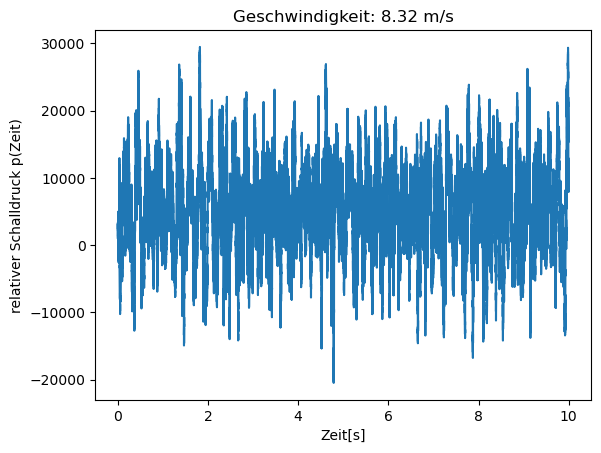

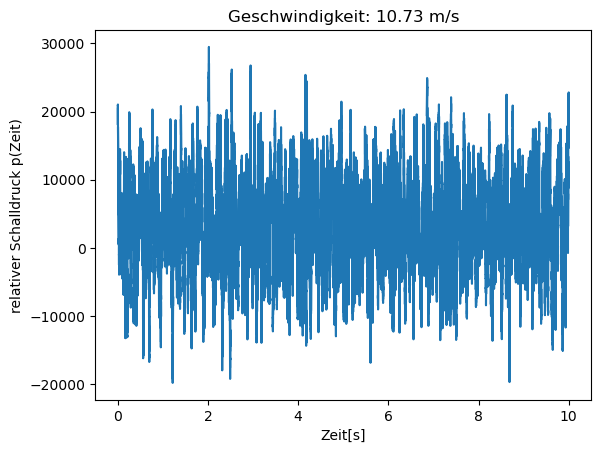

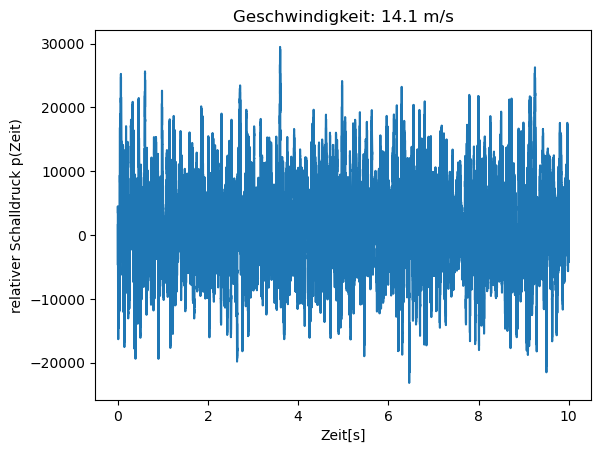

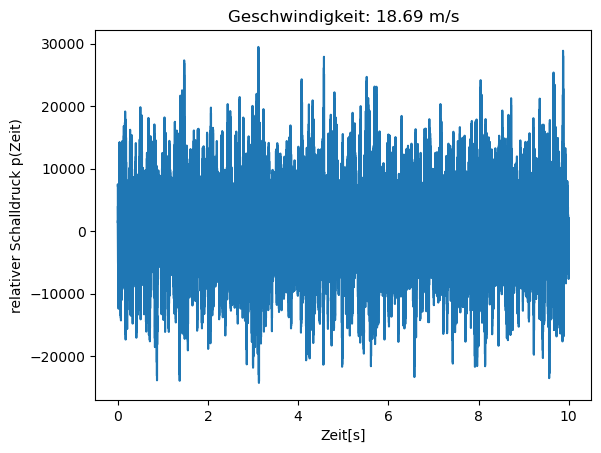

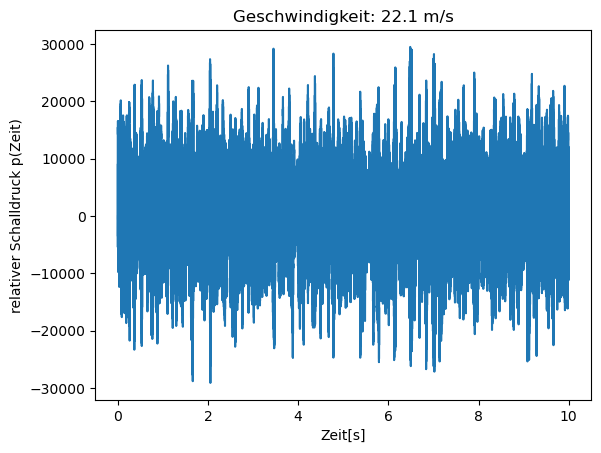

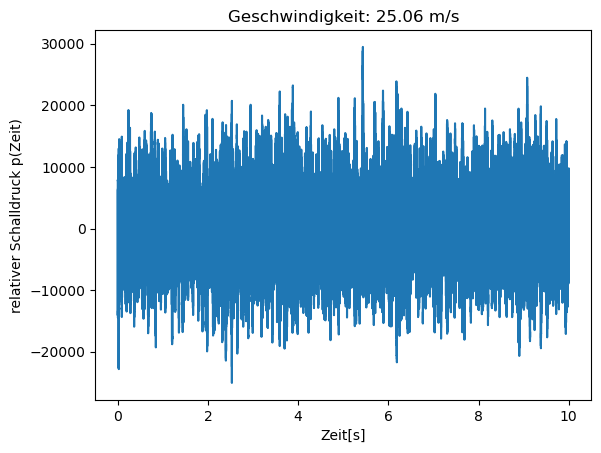

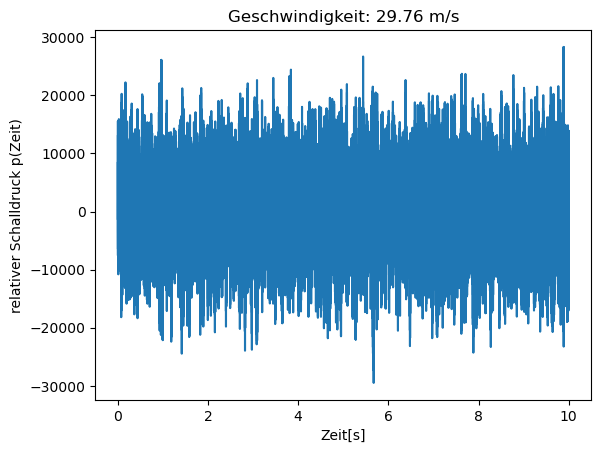

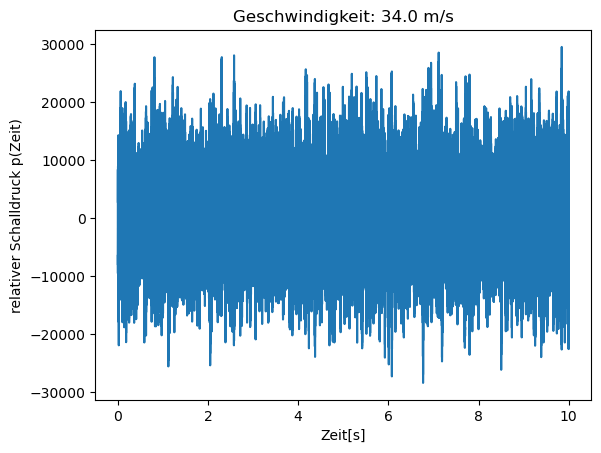

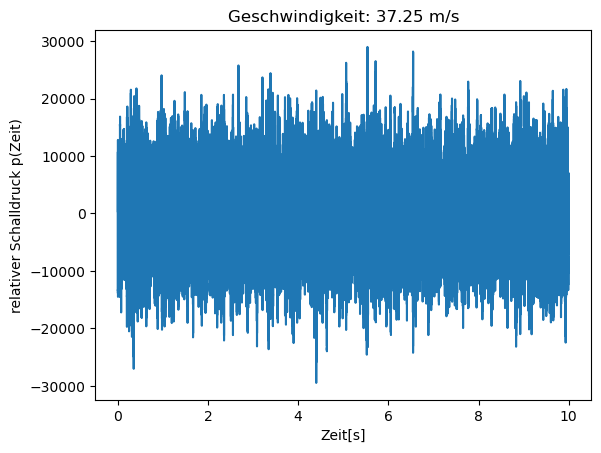

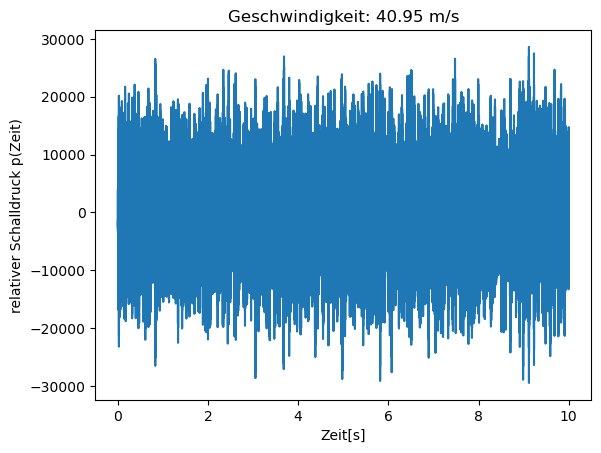

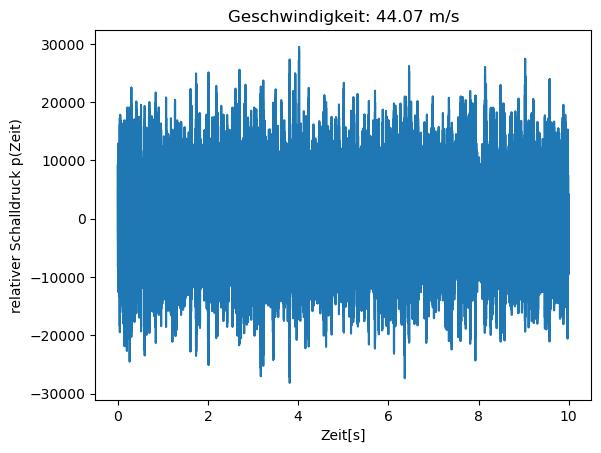

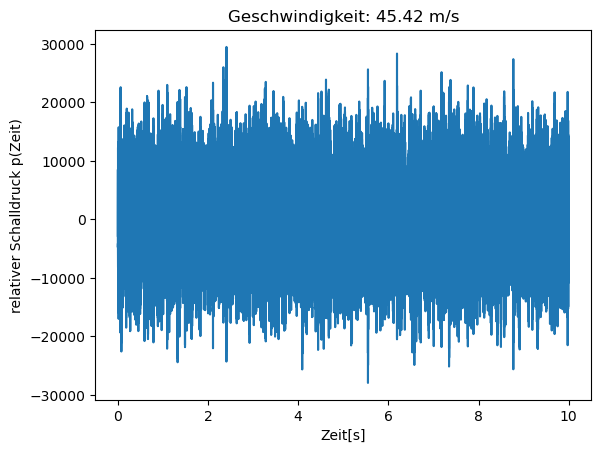

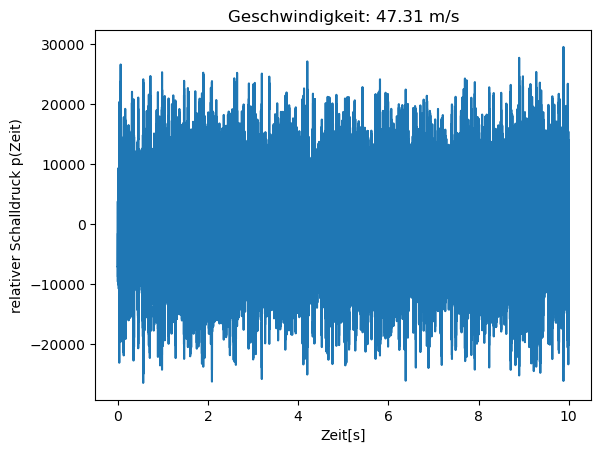

7168895
51200


In [51]:

import scipy
from scipy.io import wavfile
import matplotlib.pyplot as plt

dataArr = []

for i,datei in enumerate(doc):
   
    samplerate, data = wavfile.read(path + "/" + datei)
    dataArr.append(data)
    #samplerate = units of samples per second --> time = samples/samplerate
    time = [float(a)/samplerate for a in range(len(data))]
    
    plt.plot(time,data)
    plt.xlabel("Zeit[s]")
    plt.ylabel("relativer Schalldruck p(Zeit)") 
    
    #for i in vlist:
    plt.title("Geschwindigkeit: "+ str(vlist[i]) + ' m/s')
        
    plt.show()
   
    
    

nsamples = len(str(time))
fs =samplerate

print(nsamples)
print(fs)


In [52]:
# Hier sind einige Plausibilitätstests:
assert fs>5e4 and fs<6e4, 'Abtastfrequenz'
assert nsamples>4e5, 'Anzahl Messwerte'

Um aus den Zeitdaten $p(t)$ Informationen über die darin enthaltenen Töne zu ermitteln, ist es sinnvoll, aus den Datensätzen jeweils ein Spektrum $p(f)$ zu berechnen. 
Dies geschieht allgemein über eine [Fourier-Transformation](https://de.wikipedia.org/wiki/Fourier-Transformation) bzw. für diskret abgetastete Werte mittels einer [Diskreten Fourier-Transformation](https://de.wikipedia.org/wiki/Diskrete_Fourier-Transformation) (DFT). Für reellwertige Signale ist diese z.B. im Modul [*numpy.fft*](https://docs.scipy.org/doc/numpy/reference/routines.fft.html) mit der Funktion [*rfft()*](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.rfft.html) implementiert.

### 2) Hiebton

**2.1) Berechnen Sie die Spektren (Amplitudenquadrat über Frequenz) aller Zeitsignale und stellen Sie sie in einem gemeinsamen Diagramm dar:**

  * Berechnen Sie das [Betragsquadrat](https://de.wikipedia.org/wiki/Betragsquadrat) $|p(f)|^2$ für die einzelnen Werte.
  * Stellen Sie diese nur für Frequenzen [bis](https://docs.scipy.org/doc/numpy/reference/generated/numpy.searchsorted.html) 2500 Hz dar. Beschriften Sie die x-Achse korrekt.
  * Um den ggf. verdeckten Verlauf einiger Spektren sichtbar zu machen, setzen Sie den Parameter *alpha* der Plotfunktion auf einen Wert kleiner als 1.
  * Wählen Sie eine ausreichende Größe der Abbildung.
  * Stellen Sie die y-Achse mit logarithmischer Skalierung dar.
  * Fügen Sie der Abbildung eine Legende hinzu, damit die jeweiligen Spektren zu den Geschwindigkeiten zuordenbar sind.
  
_Hinweis: Die zugehörigen Frequenzen lassen sich mithilfe der Funktion [rfftfreq()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.rfftfreq.html) berechnen. 
Anzahl der Samples sowie Abtastrate sind bereits aus Aufgabenteil 1 bekannt._

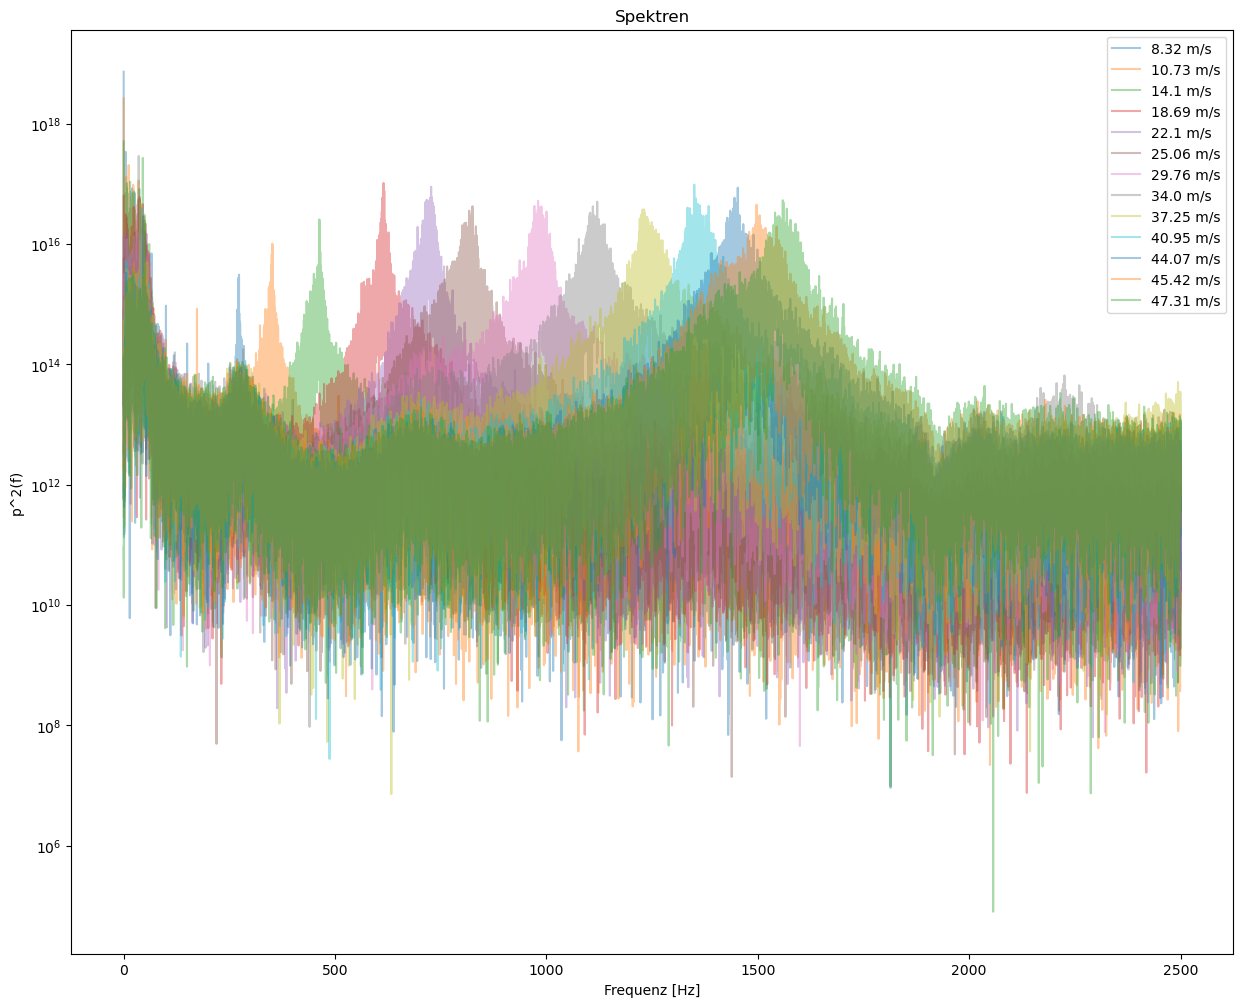

In [55]:

from numpy.fft import rfftfreq
from numpy.fft import rfft
from numpy import searchsorted

plt.figure(figsize =  (15,12))

x_f_all = []
y_f_all = []
for i, data in enumerate(dataArr):
    
     # Fourier-Trafo:
    y_f = rfft(data) #amplitude 
    x_f = rfftfreq(len(data), d = 1.0/samplerate) #frequency values of the corresponding amplitudes
   
    #Frequenzen bis 2500 Hz betrachtet
    crop = np.searchsorted(x_f,2500)
    y_fsqr = np.abs(np.square(y_f[:crop])) #Betragsquadrat 
    
    plt.plot(x_f[:crop],y_fsqr, alpha = 0.4,label=str(vlist[i]) + ' m/s')
    x_f_all.append(x_f[:crop])
    y_f_all.append(y_fsqr)
    

plt.xlabel("Frequenz [Hz]") 
plt.ylabel("p^2(f)") 
plt.yscale("log")
plt.title("Spektren")
plt.legend()
plt.show()

#print (x_f,y_f,y_fsqr)


**2.2) Finden Sie für jede Strömungsgeschwindigkeit den jeweils markanten Ton (d.h. den Maximalwert im Spektrum).**
  * Vernachlässigen Sie in Ihrer Betrachtung Frequenzen unter 100 Hz.
  * Speichern Sie die charakteristischen Frequenzen in einem Dictionary `fhieb` mit den zugehörigen Geschwindigkeiten in `vlist` als Keys
  * Geben Sie die charakteristische Frequenz $f_\mathrm{hieb}$ für jede Geschwindigkeit $v$ in übersichtlicher Form aus, z.B.: `v:  0.00 m/s,    f:    0.0 Hz`

In [57]:

fhieb ={}


for i, x, y in zip(range(len(x_f_all)), x_f_all, y_f_all):
    
    y = y[np.where(x > 100)] #Betrachtung: unter 100 Hz 
    max_idx_y = np.argmax(y) #Index des markanten Tons (d.h. den Maximalwert im Spektrum)
    
    fhieb[vlist[i]] = x[max_idx_y + 1000]  #Korrektur 
    
    
for key in fhieb.keys():
    print('v: %.2f m/s\tf: %.2f Hz' %(key,fhieb[key]))
        
   

v: 8.32 m/s	f: 272.70 Hz
v: 10.73 m/s	f: 351.60 Hz
v: 14.10 m/s	f: 462.90 Hz
v: 18.69 m/s	f: 614.60 Hz
v: 22.10 m/s	f: 727.10 Hz
v: 25.06 m/s	f: 824.90 Hz
v: 29.76 m/s	f: 980.10 Hz
v: 34.00 m/s	f: 1120.00 Hz
v: 37.25 m/s	f: 1227.50 Hz
v: 40.95 m/s	f: 1349.60 Hz
v: 44.07 m/s	f: 1452.50 Hz
v: 45.42 m/s	f: 1497.00 Hz
v: 47.31 m/s	f: 1559.10 Hz


In [58]:
# Hier sind einige Plausibilitätstests:
assert max(fhieb.values())<1600, 'max. Hiebton'
assert min(fhieb.values())>200, 'min. Hiebton'
assert 600<fhieb[18.69]<650, 'Hiebton bei 18.69 m/s'


### 3) Modellbildung

Es soll angenommmen werden, dass ein annähernd linearer Zusammenhang der beiden Größen $v$ und $f$ besteht. 
Um diesen zu ermitteln, soll daher eine [Regressionsgerade](https://de.wikipedia.org/wiki/Lineare_Einfachregression) berechnet werden.
Eine Gerade im zweidimensionalen Raum ist definiert durch 2 Parameter $a, b$:
$$
f = a\,v + b
$$

Die Koeffizienten $a$ und $b$ der Regressionsgerade berechnen sich über:

$$
a=\frac{\sum_{i=1}^{N} (v_i - \overline v)(f_i - \overline f)}{\sum_{i=1}^{N}(v_i - \overline v)^2}\\
b=\overline f - a\,\overline v
$$

**3.1) Schreiben Sie eine Funktion _ab()_, die für beliebige, gleich lange Arrays _v_ und _f_ die Geraden-Parameter _a_ und _b_ berechnet und zurückgibt.**

In [59]:

def ab(v,f):
    vBar = np.mean(v)
    fBar = np.mean(f)
    
    n = np.sum((v-vBar)*(f-fBar))
    z = np.sum((v-vBar)**2)
    
    a = n/z
    b = fBar - a*vBar
    return a,b

In [60]:
# Hier ist ein Plausibilitätstest:
import numpy as np
assert ab(np.array([1,2]),np.array([0,1])) == (1.,-1.), 'a,b-Funktion'

**3.2) Wenden Sie die Funktion auf die Wertepaare aus Aufgabenteil 2.2 an.**

  * Speichern Sie die sich aus der Regression ergebenden Koeffizienten $a$ und $b$ in den Variablen `a` und `b`.
  * Zeichnen Sie die Regressionsgerade (als Linie) zusammen mit den Ausgangswerten (als Punkte) in ein Diagramm. Achten Sie auf korrekte Achsenbeschriftungen.
  * Zeichnen Sie die Abweichung der gemessenen Werte zur Regressionsgerade in ein separates Diagramm.
  * Berechnen Sie anschließend, welche charakteristischen Töne bei $v=2\,\frac{\text{m}}{\text{s}}$, $v=15\,\frac{\text{m}}{\text{s}}$, $v=42\,\frac{\text{m}}{\text{s}}$ und $v=50\,\frac{\text{m}}{\text{s}}$ zu erwarten sind und speichern Sie die Ergebnisse in einem Dictionary `fhieb_vorhersage`.
  

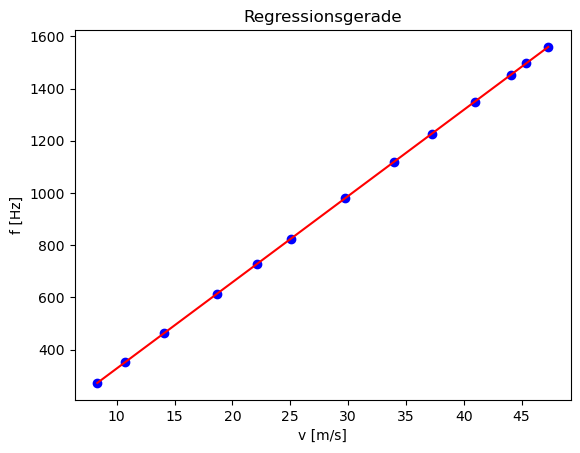

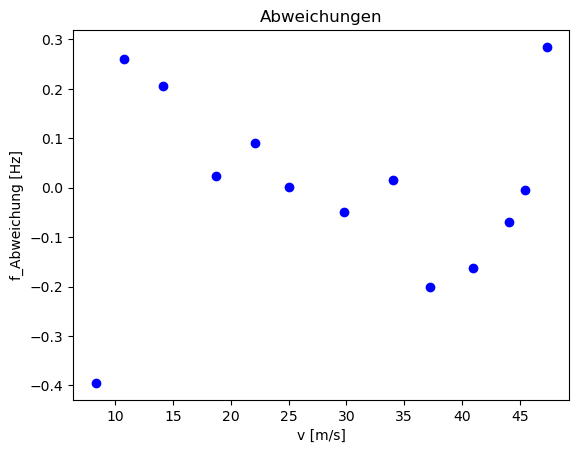

v:  2 m/s	f:  63.68 Hz
v:  15 m/s	f:  492.82 Hz
v:  42 m/s	f:  1384.10 Hz
v:  50 m/s	f:  1648.18 Hz


In [61]:

#array aus den keys bzw. values der dictionary:
key_arr = np.array(list(fhieb.keys()))
value_arr = np.array(list(fhieb.values()))

#key_arr enthält die Geschwindigkeitsterme v, value_arr enthält die Freuquenzen
a, b = ab(key_arr, value_arr)

#Liste für die Regressionsgerade

reg_list = a*key_arr + b

#Plot:
plt.plot(key_arr,value_arr, 'o', color = 'blue')
plt.plot(key_arr,reg_list, color = 'red')
plt.xlabel("v [m/s]")
plt.ylabel("f [Hz]")
plt.title("Regressionsgerade")
plt.show()


#Abweichung:
abweichung = reg_list - value_arr #keys sind gleich für beide
#Plot:
plt.plot(key_arr,abweichung, 'o', color = 'blue')
plt.xlabel("v [m/s]")
plt.ylabel("f_Abweichung [Hz]")
plt.title("Abweichungen")
plt.show()

#Vorhersage:
#speed --> die vorgegebene Geschwindigkeiten, char-Ton --> charakteristische Töne ermittelt durch die Geradengleichung.
speed = np.array([2,15,42,50]) 
char_Ton = a*speed + b


for v,f in zip(speed, char_Ton):
    print(f'v:  {v} m/s\tf:  {f:.2f} Hz')
    
# in dictionary speichern:
fhieb_vorhersage = dict(zip(speed, char_Ton))



In [62]:
# Hier sind einige Plausibilitätstests:
assert len(fhieb_vorhersage) == 4
assert b<a and a-b > 35
assert fhieb_vorhersage[2]<fhieb_vorhersage[15]<500